<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/M3L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#M3L2
#linear classifiers and perceptron algorithm

**Linear classifiers** can be understood as form of **classifiers** (which will classify things into two different output categories) and we are doing this by **involving a linear equation**.

## Let's understood how line can classify datapoints using an example:<br>
Given a line as G(X), where X are values of different features given in (d+1)-dimensioanl vector form:<br>
$G(X) = w^TX = 6x_1 + 3x_2 - 12$<br>
(Here, d=2 and w = [6,3,-12], we are assuming the augmented version of w or coefficient vector)

In [2]:
#making a toy dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt

points=np.array([[1,2,1]])

import random
for i in range(10):
  x1=random.randint(0,3)
  x2=random.randint(0,5)
  x=np.asarray([[x1,x2,1]]) #adding biased term at end for augmented version of x as well
  points=np.append(points,x,axis=0)

print(points)  

[[1 2 1]
 [3 5 1]
 [3 2 1]
 [2 0 1]
 [2 0 1]
 [1 0 1]
 [3 1 1]
 [2 1 1]
 [0 2 1]
 [3 4 1]
 [0 1 1]]


In [4]:
#w values
w=np.asarray([6,3,-12])

In [5]:
#linear classification by checking the value of G(x)
def linClassification(w,points):
  for p in points:
    gx=0
    for i in range(len(w)):
      gx+=w[i]*p[i]
    if(gx<0):
      plt.scatter(p[0],p[1],s=120,marker='_',linewidths=2)
    elif(gx>0):
      plt.scatter(p[0],p[1],s=120,marker='+',linewidths=2)
    else:
      plt.scatter(p[0],p[1],s=120,marker='o',linewidths=2)

def linClassification_VectorialForm(w,points):
  for p in points:
    gx=np.sum(w*p)
    if(gx<0):
      plt.scatter(p[0],p[1],s=120,marker='_',linewidths=2)
    elif(gx>0):
      plt.scatter(p[0],p[1],s=120,marker='+',linewidths=2)
    else:
      plt.scatter(p[0],p[1],s=120,marker='o',linewidths=2)  

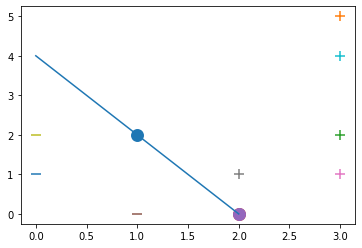

In [6]:
#plotting the dividing line using axis intercepts
plt.plot([2,0],[0,4])
linClassification(w,points)
plt.show()

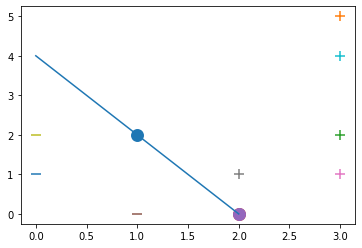

In [7]:
#doing the same using vector form
plt.plot([2,0],[0,4])
linClassification_VectorialForm(w,points)
plt.show()

So, we can see that how line can classify the data points. And we understand how it is done. But how do we get to know the correct line which would stand as our answer for the dataset.

So, to get the required line, we will try to understand various Linear Classifiers.

### First we have Perceptron Update algorithm to find the required line

We can now code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set.

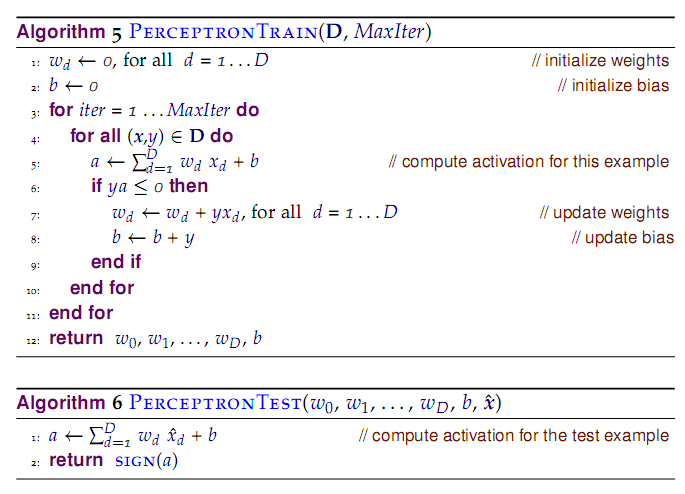

By checking **$y.a <= 0$**, misclassifed data-points have been checked and update is being done accordingly.

For larger data sets it makes sense, to randomly pick a sample during each iteration in the for-loop(s) (i.e, **Batch Perceptron Update**).

The below mentioned algorithm is shown in the above image.

In [8]:
#creating label dataset for illustration of the above algorithm
x=np.array([
            [-2,4,-1],
            [4,1,-1],
            [1,6,-1],
            [2,4,-1],
            [6,2,-1],
])

y=np.array([-1,-1,1,1,1])

In [9]:
def perceptron_algo(x,y):
  #random line to start the algorithm
  w=np.zeros(len(x[0]))
  eta=1
  epochs=10

  for epoch in range(epochs):
    for i,x in enumerate(x):
      if(np.dot(x[i],w)*y[i])<=0:
        w=w+eta*x[i]*y[i]

  return w      

In [10]:
def perceptron_algo_plot(x,y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w=np.zeros(len(x[0]))
    eta=1
    n=30
    errors=[]
    missclassified_points=[]
    avg_errors=[]

    for i in range(n):
      total_error=0
      number=0
      for i,j in enumerate(x):
        if((np.dot(x[i], w))*y[i]) <= 0:
          number+=1
          total_error+=(np.dot(x[i],w)*y[i])
          w=w+eta*x[i]*y[i]
      errors.append(total_error*-1)
      missclassified_points.append(number)
      if(number==0):
        avg_errors.append(number)
      else:
        avg_errors.append((total_error*-1)/number)  

    plt.plot(missclassified_points,label='Number of missclassified points')    
    plt.plot(errors,label='Error caused by missclassified data')
    plt.xlabel('Epoch')
    plt.ylabel('Total loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(missclassified_points,label='Number of missclassified points')
    plt.plot(avg_errors,label='Average Error caused by missclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

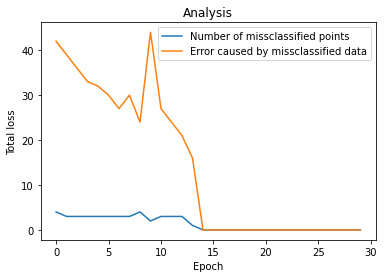

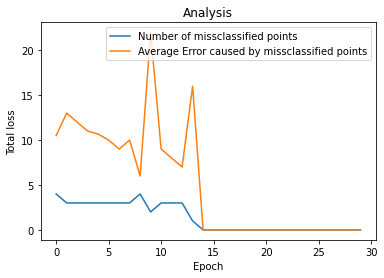

In [11]:
w=perceptron_algo_plot(x,y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

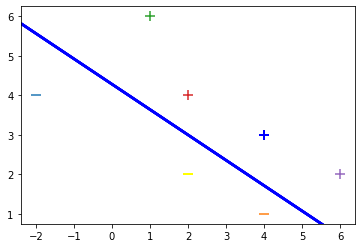

In [12]:
for d,sample in enumerate(x):
  #plot the negative samples
  if d<2:
    plt.scatter(sample[0],sample[1],s=120,marker='_',linewidths=2)
  else:
    plt.scatter(sample[0],sample[1],s=120,marker='+',linewidths=2)  

  #adding test samples
  plt.scatter(2,2,s=120,marker="_",linewidths=2,color='yellow')  
  plt.scatter(4,3,s=120,marker='+',linewidths=2,color='blue')

  #print the hyperplane claculated by perceptron_sgd()
  x2=[w[0],w[1],-w[1],w[0]]
  x3=[w[0],w[1],w[1],-w[0]]

  x2x3=np.array([x2,x3])
  x,y,u,v=zip(*x2x3)
  ax=plt.gca()
  ax.quiver(x,y,u,v,scale=1,color='blue')

In [13]:
import pandas as pd
df=pd.read_csv('/content/sonar_csv.csv')
df

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [14]:
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [15]:
df['Class'].value_counts()

Mine    111
Rock     97
Name: Class, dtype: int64

In [16]:
df.shape

(208, 61)

In [17]:
x1=df.iloc[:,0:60].values
y1=df.iloc[:,60].values

In [18]:
for i in range(len(y1)):
  if(y1[i]=='Mine'):
    y1[i]=1
  elif(y1[i]=='Rock'):
    y1[i]=-1

In [19]:
y1=pd.to_numeric(y1)

In [20]:
def perceptron_algo_plotn(x,y,n):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w=np.zeros(len(x[0]))
    eta=1
    n=n
    errors=[]
    missclassified_points=[]
    avg_errors=[]

    for i in range(n):
      total_error=0
      number=0
      for i,j in enumerate(x):
        if((np.dot(x[i], w))*y[i]) <= 0:
          number+=1
          total_error+=(np.dot(x[i],w)*y[i])
          w=w+eta*x[i]*y[i]
      errors.append(total_error*-1)
      missclassified_points.append(number)
      if(number==0):
        avg_errors.append(number)
      else:
        avg_errors.append((total_error*-1)/number)  

    plt.plot(missclassified_points,label='Number of missclassified points')    
    plt.plot(errors,label='Error caused by missclassified data')
    plt.xlabel('Epoch')
    plt.ylabel('Total loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(missclassified_points,label='Number of missclassified points')
    plt.plot(avg_errors,label='Average Error caused by missclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

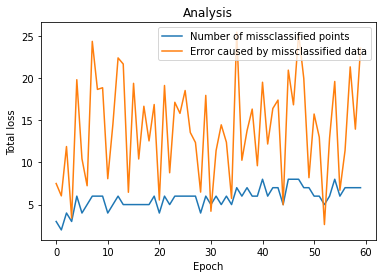

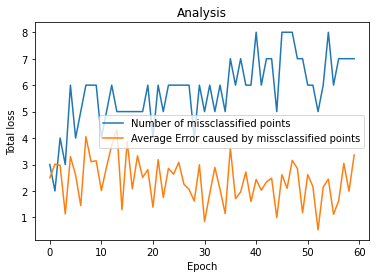

In [21]:
w=perceptron_algo_plotn(x1,y1,60)

In [22]:
p=0
w1=np.transpose(w)
for i in range(x1.shape[0]):
  if(np.dot(x1[i],w)*y1[i]>0):
    p+=1  
print(p)    
x1.shape
# %100 accuracy

112


(208, 60)

In [23]:
x=np.array([
            [-2,4,-1],
            [4,1,-1],
            [1,6,-1],
            [2,4,-1],
            [6,2,-1],
])

y=np.array([-1,-1,1,1,1])

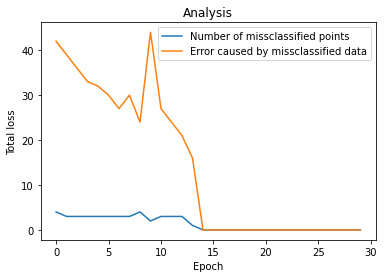

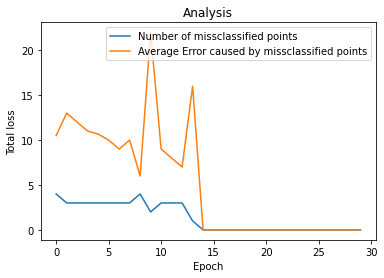

In [24]:
w=perceptron_algo_plot(x,y)

In [25]:
def perceptron_algo_plot2(x,y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w=np.zeros(len(x[0]))
    eta=0.5
    n=30
    errors=[]
    missclassified_points=[]
    avg_errors=[]

    for i in range(n):
      total_error=0
      number=0
      for i,j in enumerate(x):
        if((np.dot(x[i], w))*y[i]) <= 0:
          number+=1
          total_error+=(np.dot(x[i],w)*y[i])
          w=w+eta*x[i]*y[i]
      errors.append(total_error*-1)
      missclassified_points.append(number)
      if(number==0):
        avg_errors.append(number)
      else:
        avg_errors.append((total_error*-1)/number)  

    plt.plot(missclassified_points,label='Number of missclassified points')    
    plt.plot(errors,label='Error caused by missclassified data')
    plt.xlabel('Epoch')
    plt.ylabel('Total loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(missclassified_points,label='Number of missclassified points')
    plt.plot(avg_errors,label='Average Error caused by missclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

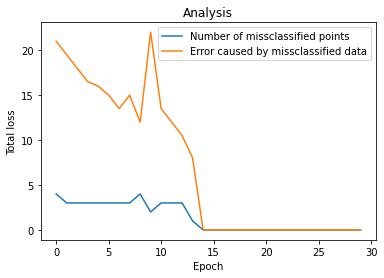

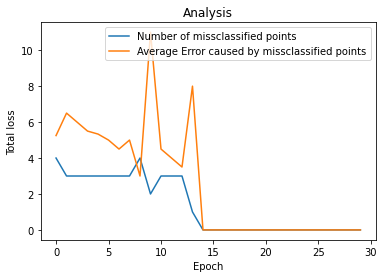

In [26]:
w=perceptron_algo_plot2(x,y)

In [27]:
x=np.array([
            [-2,4,-1],
            [4,1,-1],
            [1,6,-1],
            [2,4,-1],
            [6,2,-1],
])

y=np.array([-1,-1,1,1,1])

In [28]:
def perceptron_algo_plot3(x,y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w=np.zeros(len(x[0]))
    eta=1.5
    n=30
    errors=[]
    missclassified_points=[]
    avg_errors=[]

    for i in range(n):
      total_error=0
      number=0
      for i,j in enumerate(x):
        if((np.dot(x[i], w))*y[i]) <= 0:
          number+=1
          total_error+=(np.dot(x[i],w)*y[i])
          w=w+eta*x[i]*y[i]
      errors.append(total_error*-1)
      missclassified_points.append(number)
      if(number==0):
        avg_errors.append(number)
      else:
        avg_errors.append((total_error*-1)/number)  

    plt.plot(missclassified_points,label='Number of missclassified points')    
    plt.plot(errors,label='Error caused by missclassified data')
    plt.xlabel('Epoch')
    plt.ylabel('Total loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(missclassified_points,label='Number of missclassified points')
    plt.plot(avg_errors,label='Average Error caused by missclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

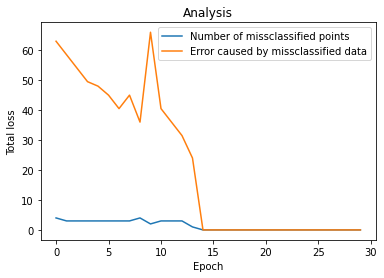

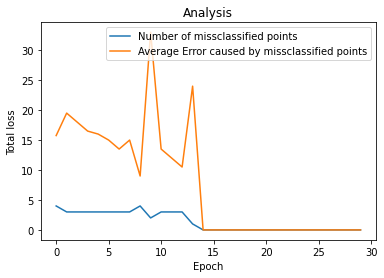

In [29]:
w=perceptron_algo_plot3(x,y)

In [30]:
x=np.array([
            [-2,4,-1],
            [4,1,-1],
            [1,6,-1],
            [2,4,-1],
            [6,2,-1],
])

In [31]:
y=np.array([-1,-1,1,-1,-1])

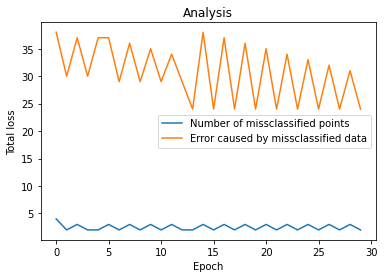

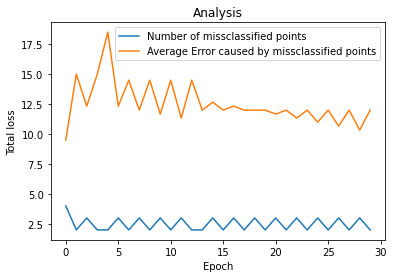

[-2.  3. 15.]


In [32]:
print(perceptron_algo_plot(x,y))
#linear separeation might not be the way to go for this type of data
# the graph wont settle 

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.